## Customer Churn Prediction Using Artificial Neural Network (ANN)

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model


In [142]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [143]:
df = pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
337,2088-IEBAU,Female,0,No,No,68,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,88.15,6148.45,No
648,5644-PDMZC,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,89.50,161.5,Yes
2448,9221-OTIVJ,Female,1,No,No,14,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.85,1531.4,Yes
5966,8019-ENHXU,Male,0,Yes,No,42,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,99.45,4138.05,Yes
6227,2842-JTCCU,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),46.05,80.35,Yes


In [144]:
df.drop(['customerID'], axis=1, inplace=True)  # customer id is useless in modeling
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [145]:
df.TotalCharges.values  # its not numbers

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [146]:
df.MonthlyCharges

0        29.85
1        56.95
2        53.85
3        42.30
4        70.70
         ...  
7038     84.80
7039    103.20
7040     29.60
7041     74.40
7042    105.65
Name: MonthlyCharges, Length: 7043, dtype: float64

In [147]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull().sum()

11

In [148]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [149]:
df.shape

(7043, 20)

In [150]:
df.iloc[488]['TotalCharges']

' '

In [151]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [152]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [153]:
df1.loc[:, 'TotalCharges'] = pd.to_numeric(df1['TotalCharges'], errors='coerce')

In [154]:
df1.TotalCharges.dtype

dtype('O')

**Data Visualization**


In [155]:
df1[df1.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


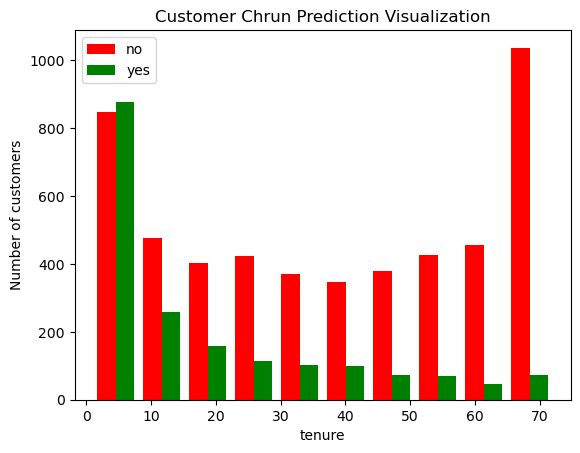

In [156]:
tenure_no_churn = df1[df1.Churn == 'No'].tenure
tenure_yes_churn = df1[df1.Churn == 'Yes'].tenure

plt.xlabel('tenure')
plt.ylabel('Number of customers')
plt.title('Customer Chrun Prediction Visualization')
plt.hist([tenure_no_churn, tenure_yes_churn], color=['red', 'green'], label=['no', 'yes'])
plt.legend()

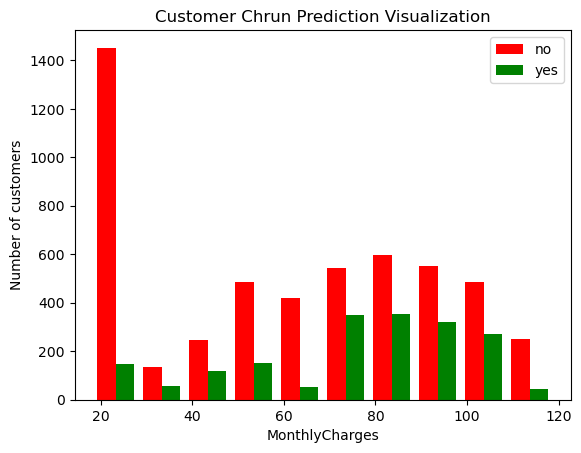

In [157]:
mc_no_churn = df1[df1.Churn == 'No'].MonthlyCharges
mc_yes_churn = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel('MonthlyCharges')
plt.ylabel('Number of customers')
plt.title('Customer Chrun Prediction Visualization')
plt.hist([mc_no_churn, mc_yes_churn], color=['red', 'green'], label=['no', 'yes'])
plt.legend()

# as the charges increase, still customer leaving bar high as when charges is low, compnay is in doom

**Data cleaning**


In [158]:
def print_unique_col_value(df):
    for col in df:
        if df[col].dtype == 'object':
            print(f' {col} : {df[col].unique()}')


print_unique_col_value(df1)

 gender : ['Female' 'Male']
 Partner : ['Yes' 'No']
 Dependents : ['No' 'Yes']
 PhoneService : ['No' 'Yes']
 MultipleLines : ['No phone service' 'No' 'Yes']
 InternetService : ['DSL' 'Fiber optic' 'No']
 OnlineSecurity : ['No' 'Yes' 'No internet service']
 OnlineBackup : ['Yes' 'No' 'No internet service']
 DeviceProtection : ['No' 'Yes' 'No internet service']
 TechSupport : ['No' 'Yes' 'No internet service']
 StreamingTV : ['No' 'Yes' 'No internet service']
 StreamingMovies : ['No' 'Yes' 'No internet service']
 Contract : ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling : ['Yes' 'No']
 PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 TotalCharges : [29.85 1889.5 108.15 ... 346.45 306.6 6844.5]
 Churn : ['No' 'Yes']


In [159]:
df1 = df1.replace('No internet service', 'No')
df1 = df1.replace('No phone service', 'No')

C:\Users\91630\AppData\Local\Temp\ipykernel_3948\1563682954.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df1.replace('No internet service', 'No')


In [160]:
print_unique_col_value(df1)

 gender : ['Female' 'Male']
 Partner : ['Yes' 'No']
 Dependents : ['No' 'Yes']
 PhoneService : ['No' 'Yes']
 MultipleLines : ['No' 'Yes']
 InternetService : ['DSL' 'Fiber optic' 'No']
 OnlineSecurity : ['No' 'Yes']
 OnlineBackup : ['Yes' 'No']
 DeviceProtection : ['No' 'Yes']
 TechSupport : ['No' 'Yes']
 StreamingTV : ['No' 'Yes']
 StreamingMovies : ['No' 'Yes']
 Contract : ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling : ['Yes' 'No']
 PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn : ['No' 'Yes']


In [161]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col] = df1[col].replace({'Yes': 1, 'No': 0})

C:\Users\91630\AppData\Local\Temp\ipykernel_3948\677024010.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col] = df1[col].replace({'Yes': 1, 'No': 0})


In [162]:
print_unique_col_value(df1)

 gender : ['Female' 'Male']
 InternetService : ['DSL' 'Fiber optic' 'No']
 Contract : ['Month-to-month' 'One year' 'Two year']
 PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [163]:
df1['gender'] = df1['gender'].replace({'Male': 1, 'Female': 0})

C:\Users\91630\AppData\Local\Temp\ipykernel_3948\1663923385.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'] = df1['gender'].replace({'Male': 1, 'Female': 0})


In [164]:
df1['gender'].unique()

array([0, 1], dtype=int64)

**one hot encoding**


In [165]:
df2 = pd.get_dummies(df1, columns=['InternetService', 'Contract', 'PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [166]:
df2.shape

(7032, 27)

In [167]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

**Scaling the data**


In [168]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']


scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4310,1,0,0,0,1.000000,0,0,1,1,1,...,True,False,False,False,False,True,True,False,False,False
187,1,0,0,0,0.028169,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
5925,1,0,0,0,0.267606,1,1,0,1,0,...,True,False,False,False,True,False,False,False,True,False
3314,0,0,0,0,0.507042,1,0,0,1,1,...,False,True,False,False,True,False,False,False,True,False
2268,0,0,0,0,0.549296,1,0,0,0,0,...,False,False,True,False,False,True,True,False,False,False


In [169]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [170]:
X = df2.drop('Churn', axis=1)
y = df2['Churn']

In [175]:
X.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6085,0,0,0,0,0.028169,1,1,0,0,0,...,True,False,False,True,False,False,False,False,False,True
1445,1,0,0,0,0.267606,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True
1175,0,0,0,0,0.169014,1,1,1,0,0,...,False,True,False,True,False,False,False,True,False,False
3872,1,0,1,1,0.112676,1,0,0,0,1,...,False,True,False,True,False,False,False,False,True,False
2403,0,0,1,0,0.985915,1,0,1,1,1,...,True,False,False,False,True,False,True,False,False,False


In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [172]:
X_train.shape

(5625, 26)

In [173]:
y_train.shape

(5625,)

In [184]:
X_train = X_train.astype('float32')
y_train = y_train.astype('int32')

In [186]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4959 - accuracy: 0.7552
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4294 - accuracy: 0.8009
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4208 - accuracy: 0.8023
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4154 - accuracy: 0.8046
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4134 - accuracy: 0.8057
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4113 - accuracy: 0.8050
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4098 - accuracy: 0.8082
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4078 - accuracy: 0.8073
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4064 - accuracy: 0.8092
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4040 - accura

In [187]:
X_test = X_test.astype('float32')
y_test = y_test.astype('int32')
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 5ms/step - loss: 0.4874 - accuracy: 0.7790


[0.4874281883239746, 0.7789623141288757]

In [188]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.30680522],
       [0.62609446],
       [0.02727364],
       [0.95244914],
       [0.5112306 ]], dtype=float32)

In [189]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int32

In [ ]:
y_pred = []
for ele in yp:
    if ele > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [191]:
y_pred[:5]

[0, 1, 0, 1, 1]

In [192]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       999
           1       0.62      0.61      0.61       408

    accuracy                           0.78      1407
   macro avg       0.73      0.73      0.73      1407
weighted avg       0.78      0.78      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

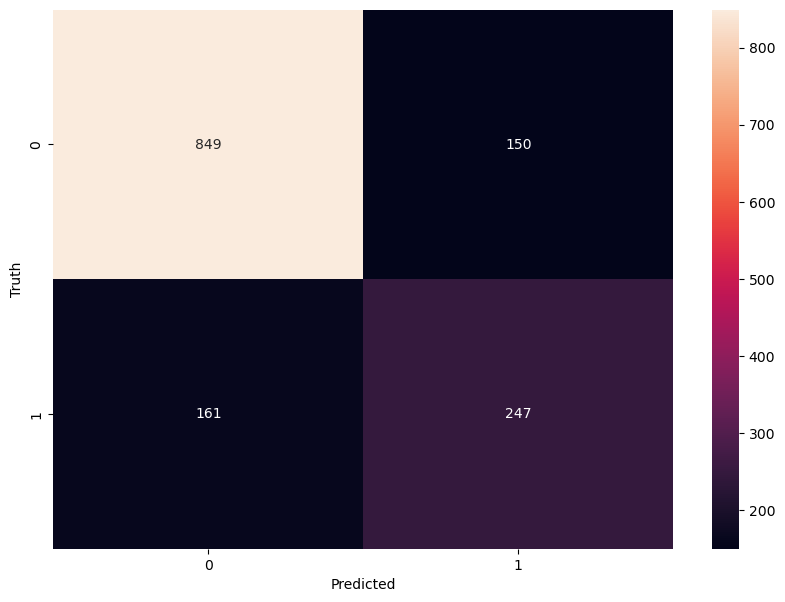

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [194]:
(849+247)/(150+161+849+247)

0.7789623312011372